<div style="background-color:lightblue">
<h1><center>
    The Data Science Labs on <br/>
     Multivariable Calculus  <br/>
   <small>by Kindyl King and Mireille Boutin</small>
</center></h1>
    </div>
<h1><center>
    Laboratory 1:<br/>
    An Exploration of Color Spaces<br/>
    <p style="font-size: 16px"> Last Updated on April 27, 2022</p>
</center></h1>

<h2 style="color:orange;"><left> Content </left></h2>

#### Mathematics ###
- 3 dimensional vectors
- curve parameterization
### Programming Skills ###
- multi-dimensional array manipulation
- while loops
- functions
### Embedded Systems ###
- Thonny and MicroPython

<h2 style="color:orange;"><left> Required Hardware </left></h2> 

- microcontroller: Raspberry Pi Pico
- breadboard
- USB connector
- NeoPixels
- Level shifter


### <span style="background-color:lightblue"> Fill in information below: </span>
__Name:__ me

__Email:__ me @ purdue.edu

## How to Use This Textbook

You are reading an interactice textbook. As you read the text, you will be asked to perform certain tasks and answer some questions. You will write your answers directly in this textbook. The textbook contains text and (Python) code written in "boxes." The boxes containing code are grey. You can run a grey box of code by holding the "shift" key while pressing the "enter" key (shift-enter). The output of the code will then be displayed below the code. Some of these boxes are labeled as "Sandbox". Feel free to use the sandboxes as a place to experiment with functions and see the capabilities of Python as you read about them. You may create additional boxes as needed by clicking the "+" sign in the menu above this window or by hovering your mouse at the bottom of a cell. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## RGB Values

Colors in Python can be specified by a red, green, and blue channel value. Each number is an integer between 0-255 and represents the intensity of red, blue, and green light that is mixed together to produce the resulting color. To display the color, we can use Matplotlib's `imshow()` function. The input to this function is a multi-dimensional array that contains information about the size of the image and the color of each pixel. Let's print just one red pixel. That means our image is size $1 \times 1$ and the color we've chosen is the vector $[255,0,0]$. In the following code cell, the variable `img` has shape $(1,1,3)$; the first two dimensions give the number of rows and the number of columns of pixels. The third dimension is 3, which tells us that `img` is a $1 \times 1$ array where each entry is a length 3 array.

(1, 1, 3)


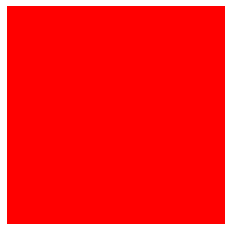

In [7]:
red = 255
green = 0
blue = 0
color = np.array([red,green,blue])

img = np.array([
    [color]
    ])
print(img.shape)

plt.imshow(img)
plt.axis('off')
plt.show()

Let's display a larger image. We can create a $2 \times 2 \times 3$ array where each pixel is a random color.

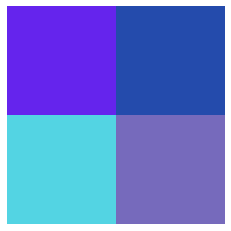

In [6]:
larger_img = np.random.randint(low = 0, high = 256, size = (2, 2, 3))

plt.imshow(larger_img)
plt.axis('off')
plt.show()

### <span style="color:red">Exercise</span>
What are the RGB values of the color in lower left square in the random $2\times 2$ array `larger_img`?
### <span style="background-color:lightblue">Answer</span>

*student answer here*

### <span style="color:red">Exercise</span>

Display the following shapes:

1. green square
2. blue square
3. yellow square
4. Purdue Old Gold square (red,green,blue) = (206, 184, 136)
5. square that is half red and half yellow

### <span style="background-color:lightblue">Answer</span>

In [22]:
# student answer here

## NeoPixels

NeoPixels are a brand of individually addressable LEDs. From a single pin, you can individually control however many LEDs are connected on the strip whether it be a single LED, a few in a line, or more complex configurations. There are tons of projects out there people have built using NeoPixels from lightsabers to music synchronized light shows. 

__add pictures__


### Connecting Everything
Do not connect your microcontroller to the computer while you are wiring things together. If you are uncertain about your wiring, ask for an instructor to check it.

<!-- | NeoPixel | Pico |
|------|------|
| GND  | GND  |
| +5V  | VBUS |
| DIN  | GP0 | -->

| NeoPixel | Level Shifter |
|------|------|
| fill  | in  |

<br>

|  Level Shifter | Pico |
|------|------|
| fill  | in  |

Once you have it wired up, connect your Pico to the computer with the USB cable. Open the file `example.py` in Thonny. Click the green play button to run the script. In order to stop the script, you will need to hit the  red "Stop" sign button in Thonny.


### <span style="color:red">Warm Up</span>

Modify the cell below to print the values in the list `["mango", "strawberry", "peach"]` over and over again for 1 second. The line `time.sleep(0.1)` causes execution to stop for 0.1 seconds before continuing in the `while` loop. It is not necessary to use the `sleep()` function, but it reduces the length of the output. 
Your output should look like
```python
mango
strawberry
peach
mango
strawberry
peach
mango
strawberry
peach
mango
```


In [ ]:
import time

start = time.time()

while (time.time()-start) < 1:
    print() # modify to print the values of list
    time.sleep(0.1)

### <span style="color:red">Exercise</span>

Create a file called `color_loop.py` that when run on the Pico makes the NeoPixels display a looping sequence of 3 different colors. Once you have finished the task, run the cell below to print the contents of `color_loop.py`.

In [ ]:
print(open('color_loop.py', 'r').read())

### <span style="color:red">Exercise</span>

In a few sentences describe how the color coordinates displayed here in a Jupyter notebook compare to the color coordinates of the NeoPixels. For example, does red look the same on the NeoPixel as it does in the Jupyter notebook?

### <span style="background-color:lightblue">Answer</span>

*student answer here*

### Duty Cycle 

So how do the NeoPixels work? The NeoPixels use something called pulse-width modulation to display different colors, which means that the LEDs within the NeoPixel are actually switching on and off at a very fast pace (about 400 times per second). Since these pulses of light alternate on and off so quickly, we only see a uniform brightness. The time between pulses determines the intensity of the color. For a half-strength red (127,0,0), the LEDs are still switching from off to full red (255,0,0), but the LED is on for an equal amount of time that it is off. 

<img src="dutycycle.png"/>

The length of a cycle in the NeoPixel is about 2.5 ms. To further interpret the graphs above (from [here](https://learn.adafruit.com/led-tricks-gamma-correction?view=all)), let's pretend that the length of a cycle is 1 second. We can simulate a 50% duty cycle by creating an animation with the library Matplotlib.

In [10]:
%matplotlib notebook
from matplotlib import animation

plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100
plt.rcParams["animation.html"] = "jshtml"

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

fps = 30        # number of frames per second
time = 5        # length of video
percent_on = 15  
fig.suptitle('{}% Duty Cycle'.format(percent_on))   

# set up axis for color
ax[0].axis('off')
im = ax[0].imshow(np.zeros((1,1,3))) 

# set up axis for time plot
ax[1].axis([0,time,0,1.5])
ax[1].set_xlabel('Time')
ax[1].set_yticks([0,1,1.5],['off','on',''])
dc, = ax[1].plot([],[])
t = np.linspace(0,time, num=fps*time)
x = []

def animate(i):
    color = np.array([0,0,255*(i%fps < (percent_on/100*fps))])
    im.set_array( [[color]] )                                   
    x.append( (i%fps < int(percent_on/100*fps))*1 )
    dc.set_data(t[:i], x[:i])
    return [im]

ani = animation.FuncAnimation(fig, animate, frames=fps*time, interval=1000/fps)
ani

<IPython.core.display.Javascript object>

### <span style="color:red">Exercise</span>

__Part 1:__ Write a script called `pico_flash.py` that flashes the Pico's onboard LED with a 30% duty cycle where one cycle is 1 second long. Run the cell below the print the code you wrote.

In [ ]:
print(open('pico_flash.py', 'r').read())

__Part 2:__ Write a script called `green_flash.py` that flashes green on the NeoPixel with a 30% duty cycle where one cycle is 1 second long. Run the cell below the print the code you wrote.

In [ ]:
print(open('green_flash.py', 'r').read())

### Dithering

So far, when we choose a color to display we have 256 choices for the red channel value, 256 choice for the green channel and another 256 choices for blue.
In total, that is $256 \times 256 \times 256 = 16,777,216$ colors available to us, but clearly there is an infinite number of colors. 
Dithering is the process of adding patterns in an image to create the visual effect of colors outside of a fixed color palette.

Suppose that we can only use the colors red and yellow. We can create the illusion of orange by displaying red and yellow pixels in a large checkerboard pattern.

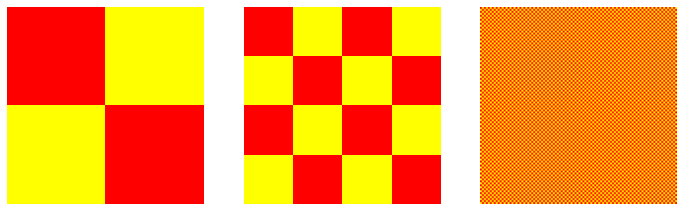

In [14]:
%matplotlib inline
palette = np.array([[255,   0,   0], # index 0: red
                    [  0, 255,   0], # index 1: green
                    [  0,   0, 255], # index 2: blue
                    [255, 255, 255], # index 3: white
                    [  0,   0,   0], # index 4: black
                    [255, 255,   0]  # index 5: yellow
                    ])

pattern = np.array([     #  make pattern using the index of the color           
    [0,5],               # 0=red, 5=yellow
    [5,0]   ])

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
ax[0].imshow(palette[pattern])
ax[0].axis('off')            
ax[1].imshow(palette[np.tile(pattern, (2,2))])
ax[1].axis('off')
ax[2].imshow(palette[np.tile(pattern, (50,50))])
ax[2].axis('off')
plt.show()

Dithering is applied within the NeoPixels to display a wide range of colors, but the color palette is much larger than simply bright red and yellow. We have red, green, and blue in varying intensities.

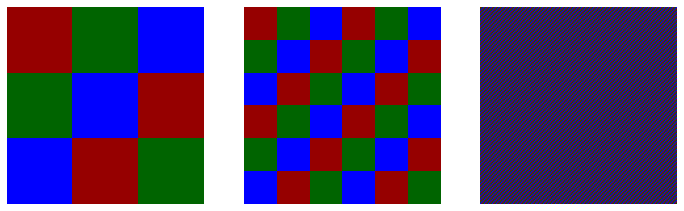

In [ ]:
palette = np.array([[150,   0,   0], # index 0: dimmer red
                    [  0, 100,   0], # index 1: dimmer green
                    [  0,   0, 255]  # index 2: blue
                    ])

pattern = np.array([     # make pattern using the index of the color       
    [0,1,2],              
    [1,2,0],
    [2,0,1]   ])

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
ax[0].imshow(palette[pattern])
ax[0].axis('off')            
ax[1].imshow(palette[np.tile(pattern, (2,2))])
ax[1].axis('off')
ax[2].imshow(palette[np.tile(pattern, (50,50))])
ax[2].axis('off')
plt.show()

<h3 style="color:green;"><left> Sandbox </left></h3>

<span style="color:green;"><left> Try out some other patterns with different colors.  </left></span>

In [ ]:
# palette = np.array([[150,   0,   0], # index 0: dim red
#                     [  0, 100,   0], # index 1: dim green
#                     [  0,   0, 255] # index 2: blue
#                     ])

# pattern = np.array([     # choose the index of the color           
#     [0,1,2],               # 0=red, 5=yellow
#     [1,2,0],
#     [2,0,1]   ])

# fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
# ax[0].imshow(palette[pattern])
# ax[0].axis('off')            
# ax[1].imshow(palette[np.tile(pattern, (2,2))])
# ax[1].axis('off')
# ax[2].imshow(palette[np.tile(pattern, (50,50))])
# ax[2].axis('off')
# plt.show()

## Color Matching Experiments

Let's see the effects of changing the red, green, and blue channel values by creating a short animation. Let's fix the red and green channel values at 120 and we will vary the blue value from 0 to 255 stepping by 1.

In [ ]:
%matplotlib notebook
from matplotlib import animation

plt.rcParams['figure.figsize'] = (3,3)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100
plt.rcParams["animation.html"] = "jshtml"

fig, ax = plt.subplots()
ax.axis('off')
im = ax.imshow( np.zeros((1,1,3)) ) 
fps = 30                                                        # number of frames per second

def animate(i):
    color = np.array([120,120,i])                               # define the color as a function of i
    im.set_array( [[color]] )                                   # display the color
    ax.set_title('RGB Values : {}'.format(list(color)))         # update the title with the RGB values
    return [im]

ani = animation.FuncAnimation(fig, animate, frames=255, interval=1000/fps)
ani

<IPython.core.display.Javascript object>

### <span style="color:red">Exercise</span>

If we think about RGB values being in a 3D cube with R on the $x$-axis, G on the $y$-axis, and B on the $z$-axis, then the gradient animation follows what kind of path?

### <span style="background-color:lightblue">Answer</span>

*student answer here*

<h3 style="color:green;"><left> Sandbox </left></h3>

<span style="color:green;"><left> Make your own movie of colors. Fix difference red, green, and blue values and see what happens.</left></span>

In [ ]:
# def animate(i):
#     color = # try something new 
#     im.set_array( [[color]] )                                   
#     ax.set_title('RGB Values : {}'.format(list(color)))
#     return [im]

# ani = animation.FuncAnimation(fig, animate, frames=255, interval=1000/fps)
# ani

### <span style="color:red">Exercise</span>

Write a script to recreate the gradient animation example on the NeoPixels and run the cell below to print the code you wrote.

In [ ]:
print(open('answer.py', 'r').read())

### <span style="color:red">Exercise</span>

Find a colorful object around you or image online. Try to match the color of the object or a color in the image by adjusting the red, green, and blue channel values and display the matched color.

### <span style="background-color:lightblue">Answer</span>

In [ ]:
# student answer here

Some of the most influential color matching experiments were done in the 1920's by W.D. Wright and J. Guild, and their methodology was similar to the exercise you just completed
[[ref1]](https://iopscience.iop.org/article/10.1088/1475-4878/30/4/301/meta?casa_token=zjfAyCvyOBcAAAAA:zajVm7GdwsTn1MwpnpXUvlOIAF6Xu1RWpnTgFbJcV846Eu0GDiHJPX44VwgA12tCVsZo-4I6u5oslN2b0JQ)
[[ref2]](https://royalsocietypublishing.org/doi/abs/10.1098/rsta.1932.0005).
In their experiments, participants tried to match a reference illuminant by adjusting the amounts of three different lights called primaries.
The amounts of each light was scaled so that the sum of the three amounts was 1. 
Wright and Guild tested reference illuminants of pure wavelengths between $400-700$ nm. 
For a given wavelength, they measured how much of each primary was needed to match it.
Naturally, this led to three functions - $r(\lambda),g(\lambda)$, and $b(\lambda)$.

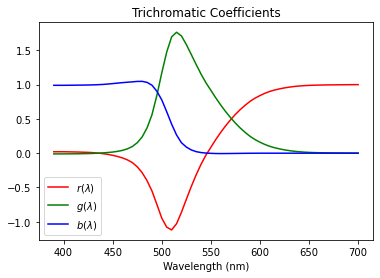

In [ ]:
%matplotlib inline

lambdas, r, g, b = np.genfromtxt('color_matching.txt', unpack=True)
plt.plot(lambdas, r, 'r', label='$r(\lambda)$')
plt.plot(lambdas, g, 'g', label='$g(\lambda)$')
plt.plot(lambdas, b, 'b', label='$b(\lambda)$')
plt.xlabel('Wavelength (nm)')
plt.title('Trichromatic Coefficients')
plt.legend()
plt.show()


There are a lot of different trichromatic coefficient functions depending on which primaries are chosen. 
For the graph above using data from [[ref]](https://philservice.typepad.com/Wright-Guild_and_CIE_RGB_and_XYZ.pages.pdf),
the primaries are 630.7 nm, 528.6 nm , and 457.3 nm .
From the table of values in the file *color_matching.txt*, we know that $r(665)=0.995, g(665)=.005$, and $b(665)=0$, so in order to match a light composed of only the wavelength 665 nm, we need of 99.5% of the 630.7 nm primary, 0.5% of the 528.6 nm primary, and none of the third primary in our mixture.

In [ ]:
index = 55
print(lambdas[index])
print(r[index])
print(g[index])
print(b[index])

665.0
0.995
0.005
0.0


The trichromatic coefficents are the ratio of primaries needed to match a wavelength of light, so $r(\lambda)+g(\lambda)+b(\lambda)=1$ for all $390 \leq \lambda \leq 700$ nm. However, not every wavelength can be matched experimentally using these three primaries. In order for the participants to match the reference, sometimes it was necessary for them to add a primary amount to the reference itself. In these cases, the trichromatic coefficients can be negative. 

## <span style="color:green">Reflection</span>

__1. What parts of the lab, if any, do you feel you did well? <br>
2. What are some things you learned today? <br>
3. Are there any topics that could use more clarification? <br>
4. Do you have any suggestions on parts of the lab to improve?__

### <span style="background-color:lightblue">Answer</span>

*student answer here*